In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13132549564482191234
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5748293632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 321306490506694054
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical

In [3]:
# Fashion MNIST 데이터셋 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape, test_labels.shape)

# 데이터 로더 생성
#batch_size = 64
#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

(60000, 10) (10000, 10)


In [4]:
# AlexNet model architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(28,28,1), kernel_size=(11,11), strides=(4,4), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('tanh'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('tanh'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Fully Connected layer
model.add(Flatten())
model.add(Dense(4096, input_shape=(32,32,3))) 
model.add(BatchNormalization()) 
model.add(Activation('tanh'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# Fully Connected Layer
model.add(Dense(4096)) 
model.add(BatchNormalization()) 
model.add(Activation('tanh')) # Add Dropout 
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10)) 
model.add(BatchNormalization()) 
model.add(Activation('softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 96)          11712     
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 7, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [5]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
# model.fit(train_images, train_labels, epochs=90, validation_data=(test_images, test_labels))

history = model.fit(train_images, train_labels, epochs=90, 
                    validation_data=(test_images, test_labels))

Epoch 1/90
1875/1875 [==============================] - 21s 10ms/step - loss: 0.8895 - accuracy: 0.7710 - val_loss: 0.5326 - val_accuracy: 0.8403
Epoch 2/90
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6626 - accuracy: 0.8403 - val_loss: 0.4503 - val_accuracy: 0.8671
Epoch 3/90
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5768 - accuracy: 0.8588 - val_loss: 0.4138 - val_accuracy: 0.8740
Epoch 4/90
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5242 - accuracy: 0.8681 - val_loss: 0.3918 - val_accuracy: 0.8791
Epoch 5/90
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4834 - accuracy: 0.8764 - val_loss: 0.3976 - val_accuracy: 0.8722
Epoch 6/90
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4472 - accuracy: 0.8835 - val_loss: 0.3748 - val_accuracy: 0.8787
Epoch 7/90
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4283 - accuracy: 0.8866 - val_loss: 0.3494 - val

Epoch 57/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0607 - accuracy: 0.9883 - val_loss: 0.4512 - val_accuracy: 0.9005
Epoch 58/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0616 - accuracy: 0.9880 - val_loss: 0.4570 - val_accuracy: 0.9016
Epoch 59/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0622 - accuracy: 0.9877 - val_loss: 0.4821 - val_accuracy: 0.8969
Epoch 60/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0562 - accuracy: 0.9892 - val_loss: 0.5423 - val_accuracy: 0.8931
Epoch 61/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0541 - accuracy: 0.9898 - val_loss: 0.4750 - val_accuracy: 0.8971
Epoch 62/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0548 - accuracy: 0.9896 - val_loss: 0.4897 - val_accuracy: 0.8957
Epoch 63/90
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0531 - accuracy: 0.9897 - val_loss: 0.6405 -

In [6]:
#fashion mnist, tanh

accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.5811 - accuracy: 0.8895
Test loss: 0.5810701251029968
Test accuracy: 0.8895000219345093


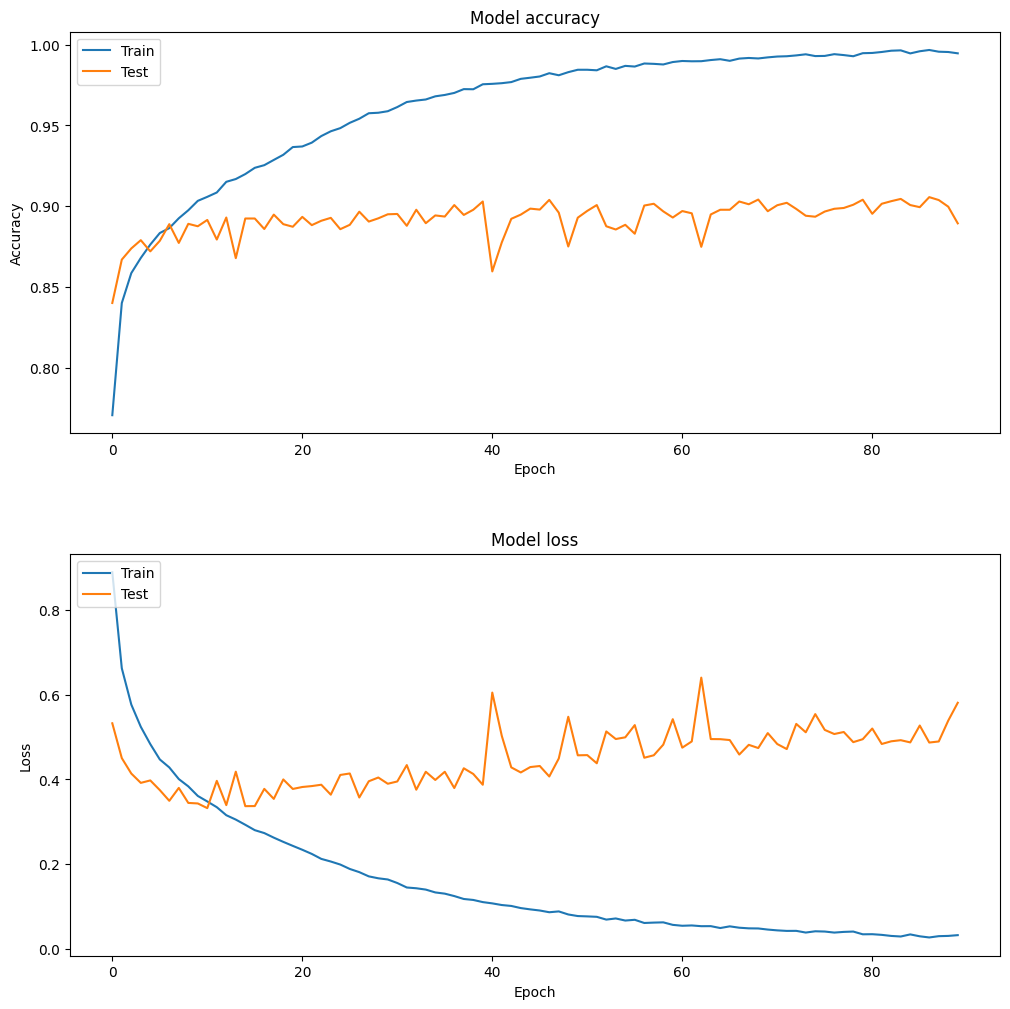

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplots_adjust(hspace=0.3)
plt.show()
